# Decoding Stock Market Journey: Leveraging NLP to Analyze 24+ Years of News Data for Stock Movement Prediction 

## 1. Introduction
 Imagine a system that can predict whether a stock's price will rise or fall tomorrow with an accuracy of nearly 89%. That's precisely what our Stock Movement Prediction System offers.




![alt text](Designer.png)

## 2. Install/import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


import yfinance as yf
from wordcloud import WordCloud
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## 3. News Data Colletion




In [3]:
# import pandas as pd
# from pygooglenews import GoogleNews

# gn = GoogleNews()

# # Data Range
# start_date = '2000-01-01'
# end_date = '2023-12-31'  

# # Convert date strings to datetime objects
# start_datetime = pd.to_datetime(start_date)
# end_datetime = pd.to_datetime(end_date)

# # Create an empty DataFrame to store the results
# all_news = pd.DataFrame(columns=['title', 'published', 'source'])

# # Iterate through each day in the date range
# current_date = start_datetime
# while current_date <= end_datetime:
#     # Get news for the current date
#     result = gn.search('MSFT OR microsoft OR Stock OR Market', from_=str(current_date), to_=str(current_date + pd.Timedelta(days=1)))
#     df = pd.DataFrame(result['entries'])
#     # Check if the DataFrame is empty
#     if df.empty:
#         # If empty, create a DataFrame with an entry for that date and empty strings
#         df = pd.DataFrame({'title': [''], 'published': [today], 'source': ['']})
#     else:
#         # Filter the DataFrame to include only entries for the current date
#         df = df[['title', 'published', 'source']]
#         df.iloc[:,1] = pd.to_datetime(df['published'],format='mixed')
#         df['published'] = df['published'].apply(lambda x: str(x).split()[0])
#         today = str(current_date).split()[0]
#         df = df[df['published'] == today]
    
    
#     # Append the filtered DataFrame to the all_news DataFrame
#     all_news = pd.concat([all_news, df], ignore_index=True)
    
#     # Move to the next day
#     current_date += pd.Timedelta(days=1)

# # Sort the DataFrame by published date
# all_news.sort_values(by='published', inplace=True)

# all_news.to_csv('MASTER_MSFT_NEWS_2000_2024.csv')

In [52]:
df_news = pd.read_csv('MASTER_MSFT_FULL.csv',index_col=[0])
df_news = df_news[['title','published','source']]
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146900 entries, 0 to 33224
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      146897 non-null  object
 1   published  146900 non-null  object
 2   source     146897 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [53]:
df_news

,title,published,source
0,Pre-IPO Lifetime Gifts of Stock or Options - W...,2000-01-01,"{'href': 'https://www.wilmerhale.com', 'title'..."
1,Microsoft Corporation offers first shares to t...,2000-01-01,"{'href': 'https://www.historylink.org', 'title..."
2,G+G Retail Targets Female Youth Market with Ra...,2000-01-01,"{'href': 'https://www.wealthmanagement.com', '..."
3,"New Markets, New Opportunities? Economic and S...",2000-01-01,"{'href': 'https://carnegieendowment.org', 'tit..."
4,Snatch Review | Movie - Empire,2000-01-01,"{'href': 'https://www.empireonline.com', 'titl..."
...,...,...,...
33220,Eye On The Market Outlook 2024: Pillow Talk - ...,2024-01-01,"{'href': 'https://www.jpmorgan.com', 'title': ..."
33221,Stock market today: Asian markets mostly slip ...,2024-01-01,"{'href': 'https://apnews.com', 'title': 'The A..."
33222,"Sensex settles marginally higher, Nifty ends f...",2024-01-01,"{'href': 'https://www.livemint.com', 'title': ..."
33223,10 2024 Stock Picks From An Investing Expert -...,2024-01-01,"{'href': 'https://www.kiplinger.com', 'title':..."


## 4. News Data Cleaning

In [54]:
print("Duplicate Values\n")
print(df_news.duplicated().sum())
print("\n##########")
print("Null Values\n")
print(df_news.isnull().sum())

Duplicate Values

166

##########
Null Values

title        3
published    0
source       3
dtype: int64


In [55]:
#Dropping both null values and Duplicates
df_news.drop_duplicates(inplace=True)
df_news.dropna(inplace=True)

In [56]:
print("Duplicate Values\n")
print(df_news.duplicated().sum())
print("\n##########")
print("Null Values\n")
print(df_news.isnull().sum())

Duplicate Values

0

##########
Null Values

title        0
published    0
source       0
dtype: int64


In [57]:
# Feature Engineering
df_news = df_news[['title','published','source']]
    
df_news['web'] = df_news['source'].apply(lambda x: eval(str(x))['href'])
df_news['author'] = df_news['source'].apply(lambda x: eval(str(x))['title'])
df_news.drop('source',axis=1,inplace=True)


df_news['published'] = pd.to_datetime(df_news['published'])
df_news = df_news.rename(index=str, columns={"published": "Date"})
df_news

,title,Date,web,author
0,Pre-IPO Lifetime Gifts of Stock or Options - W...,2000-01-01,https://www.wilmerhale.com,WilmerHale
1,Microsoft Corporation offers first shares to t...,2000-01-01,https://www.historylink.org,HistoryLink.org
2,G+G Retail Targets Female Youth Market with Ra...,2000-01-01,https://www.wealthmanagement.com,Wealth Management
3,"New Markets, New Opportunities? Economic and S...",2000-01-01,https://carnegieendowment.org,Carnegie Endowment for International Peace
4,Snatch Review | Movie - Empire,2000-01-01,https://www.empireonline.com,Empire
...,...,...,...,...
33220,Eye On The Market Outlook 2024: Pillow Talk - ...,2024-01-01,https://www.jpmorgan.com,JP Morgan
33221,Stock market today: Asian markets mostly slip ...,2024-01-01,https://apnews.com,The Associated Press
33222,"Sensex settles marginally higher, Nifty ends f...",2024-01-01,https://www.livemint.com,Mint
33223,10 2024 Stock Picks From An Investing Expert -...,2024-01-01,https://www.kiplinger.com,Kiplinger's Personal Finance


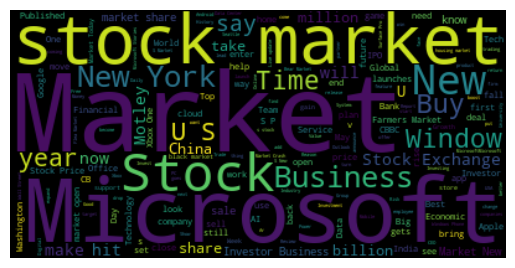

In [58]:
# Word Cloud Overview of 20+ Years of News Data

# From wordcloud import WordCloud
text = ''.join(df_news['title'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

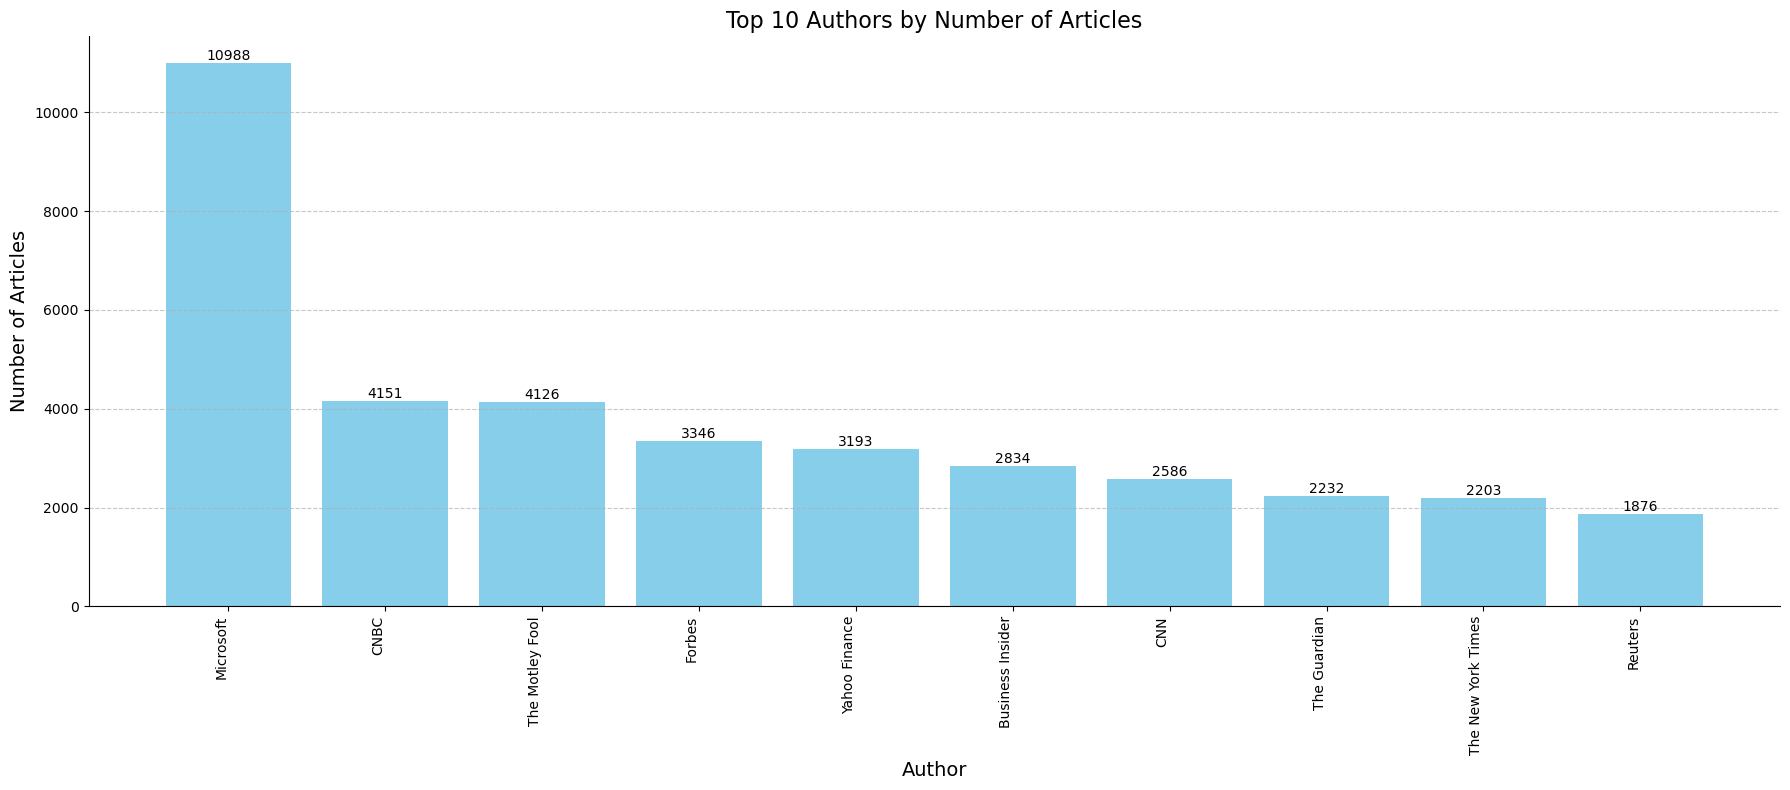

In [59]:
import matplotlib.pyplot as plt

# Assuming 'df_news' is your DataFrame and it has been previously defined.
author_counts = df_news['author'].value_counts()[:10]

plt.figure(figsize=(18, 8))  # Make the figure larger
plt.bar(author_counts.index, author_counts.values, color='skyblue')  # Add color to the bars

# Add labels and title
plt.xlabel('Author', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.title('Top 10 Authors by Number of Articles', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add value labels on top of each bar
for index, value in enumerate(author_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Remove the top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


## 5.Stock Price Data Collection

In [60]:
#df_stock = yf.download("MSFT", start="2000-01-01", end="2024-12-31", interval="1d")
# df_stock.to_csv('MSFT_STOCK.csv')
df_stock = pd.read_csv('MSFT_STOCK.csv')
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,58.68750,59.3125,56.00000,58.28125,36.065578,53228400
1,2000-01-04,56.78125,58.5625,56.12500,56.31250,34.847271,54119000
2,2000-01-05,55.56250,58.1875,54.68750,56.90625,35.214695,64059600
3,2000-01-06,56.09375,56.9375,54.18750,55.00000,34.035061,54976600
4,2000-01-07,54.31250,56.1250,53.65625,55.71875,34.479839,62013600


In [61]:
import plotly.graph_objects as go
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_stock.index, y=df_stock.Close,
                    mode='lines'))
title = []
title.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='MSFT Stock Data From 2000 Jan to 2023 Dec',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig1.update_layout(xaxis_title='Date',
                   yaxis_title='Close stock value (in Rs)',
                  annotations=title)
fig1.show()

## 6. Clean news data

The sentiment analysis process is initialized to derive compound scores spanning from 
-0.5 (indicating the most negative sentiment) to 0.5 (reflecting the most positive sentiment). 
In this phase, unrefined texts are employed to leverage VADER's capacity to interpret features such as 
capitalization and punctuation. Moreover, the subjectivity of each headline is computed utilizing the TextBlob package.
So we are not doing any kind of preprocessing on the News Column

## 7. Extracting Sentiment Values from the News Columns

In [62]:
# Combining each days news into list along with their soure website and authors
df_news = df_news.groupby('Date').agg({'title':list,'web':list,'author':list})

# Creating new column that has the combined news of that day as a list of news
df_news['combined_news'] = df_news['title'].apply(lambda x: ' '.join(x))

df_news

,title,web,author,combined_news
Date,,,,
2000-01-01,[Pre-IPO Lifetime Gifts of Stock or Options - ...,"[https://www.wilmerhale.com, https://www.histo...","[WilmerHale, HistoryLink.org, Wealth Managemen...",Pre-IPO Lifetime Gifts of Stock or Options - W...
2000-01-02,[Y2K survivalists struggle with reality - UPI ...,"[https://www.upi.com, https://www.anandtech.co...","[UPI News, AnandTech, MotorTrend]",Y2K survivalists struggle with reality - UPI N...
2000-01-03,"[Dow falters; Nasdaq gains - Jan. 3, 2000 - CN...","[https://money.cnn.com, https://www.cbsnews.co...","[CNN, CBS News, Ars Technica, Power Engineerin...","Dow falters; Nasdaq gains - Jan. 3, 2000 - CNN..."
2000-01-04,[Public Transportation Account: Options to Add...,"[https://lao.ca.gov, http://news.bbc.co.uk, ht...","[Legislative Analyst's Office, CBBC Newsround,...",Public Transportation Account: Options to Addr...
2000-01-05,"[Buddy, Can You Spare a Turbine? - Power Engin...","[https://www.power-eng.com, https://www.cbsnew...","[Power Engineering®️, CBS News, CNN, Microsoft...","Buddy, Can You Spare a Turbine? - Power Engine..."
...,...,...,...,...
2023-12-28,[Microsoft disables MSIX protocol handler abus...,"[https://www.bleepingcomputer.com, https://www...","[BleepingComputer, Star Tribune, Buyouts, Inve...",Microsoft disables MSIX protocol handler abuse...
2023-12-29,[Bill Ackman's Dividend Dream Team: Discover T...,"[https://finance.yahoo.com, https://www.si.com...","[Yahoo Finance, Sports Illustrated, Sports Ill...",Bill Ackman's Dividend Dream Team: Discover Th...
2023-12-30,[The 10 days that moved the stock market the m...,"[https://www.marketwatch.com, https://www.busi...","[MarketWatch, Business Insider, Financial Time...",The 10 days that moved the stock market the mo...


In [63]:
# get subjectivity:
# from textblob import TextBlob

def get_subjectivity(text):
    s = ' '.join(text)
    return TextBlob(s).sentiment.subjectivity

# get polarity:

def get_polarity(text):
    s =  ' '.join(text)
    return TextBlob(s).sentiment.polarity


def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [64]:
# # to get subjectivity and polarity
# df_news['Subjectivity'] = df_news['title'].apply(get_subjectivity)
# df_news['Polarity'] = df_news['title'].apply(get_polarity)

# # get Sentiment score for each day:
# compound=[]
# neg=[]
# pos=[]
# neu=[]
# SIA=0

# for i in range (0, len(df_news['combined_news'])):
#     SIA= getSIA(df_news['combined_news'].iloc[i])
#     compound.append(SIA['compound'])
#     neg.append(SIA['neg'])
#     pos.append(SIA['pos'])
#     neu.append(SIA['neu'])
  
# # putting it into the table  
# df_news['compound']= compound
# df_news['neg']= neg
# df_news['pos']=pos
# df_news['neu']=neu

In [65]:
#df_news.to_csv('MASTER_MSFT_FULL_SENTI.csv')
df_news = pd.read_csv('MASTER_MSFT_FULL_SENTI.csv')
df_news.head()

,Date,title,web,author,combined_news,Subjectivity,Polarity,compound,neg,pos,neu
0,2000-01-01,['Pre-IPO Lifetime Gifts of Stock or Options -...,"['https://www.wilmerhale.com', 'https://www.hi...","['WilmerHale', 'HistoryLink.org', 'Wealth Mana...",Pre-IPO Lifetime Gifts of Stock or Options - W...,0.241047,0.102617,0.8885,0.000,0.133,0.867
1,2000-01-02,['Y2K survivalists struggle with reality - UPI...,"['https://www.upi.com', 'https://www.anandtech...","['UPI News', 'AnandTech', 'MotorTrend']",Y2K survivalists struggle with reality - UPI N...,0.000000,0.000000,-0.3182,0.081,0.000,0.919
2,2000-01-03,"['Dow falters; Nasdaq gains - Jan. 3, 2000 - C...","['https://money.cnn.com', 'https://www.cbsnews...","['CNN', 'CBS News', 'Ars Technica', 'Power Eng...","Dow falters; Nasdaq gains - Jan. 3, 2000 - CNN...",0.550000,0.558333,0.8126,0.051,0.241,0.709
3,2000-01-04,"[""Public Transportation Account: Options to Ad...","['https://lao.ca.gov', 'http://news.bbc.co.uk'...","[""Legislative Analyst's Office"", 'CBBC Newsrou...",Public Transportation Account: Options to Addr...,0.066667,0.000000,0.0000,0.000,0.000,1.000
4,2000-01-05,"['Buddy, Can You Spare a Turbine? - Power Engi...","['https://www.power-eng.com', 'https://www.cbs...","['Power Engineering®️', 'CBS News', 'CNN', 'Mi...","Buddy, Can You Spare a Turbine? - Power Engine...",0.311111,0.211111,0.6369,0.000,0.088,0.912


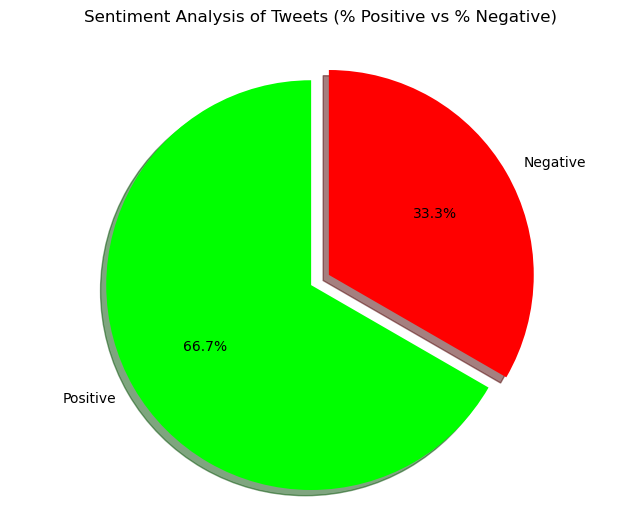

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Your data processing code remains the same
posi = 0
nega = 0
for i in range(len(df_news)):
    get_val = df_news.compound[i]
    if float(get_val) < 0:
        nega += 1
    if float(get_val) > 0:
        posi += 1
posper = (posi / len(df_stock)) * 100
negper = (nega / len(df_stock)) * 100

# Prepare data for the pie chart
arr = np.asarray([posper, negper], dtype=int)
labels = ['Positive', 'Negative']
colors = ['#00ff00','#ff0000']  # Green for positive, Red for negative
explode = (0.1, 0)  # 'Explode' the 1st slice

# Create the pie chart with the updated colors
plt.figure(figsize=(8, 6))
plt.pie(arr, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Sentiment Analysis of Tweets (% Positive vs % Negative)', pad=20)

# Display the plot
plt.show()


In [67]:
# changing the date to datetime
df_news['Date'] = pd.to_datetime(df_news['Date'])

## 8. Feature Transformation

Write ab out y we used this feature transformation

In [68]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

In [69]:
def get_tech_ind(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() #Close column
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() #Close Column

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

In [70]:
df_stock = get_tech_ind(df_stock)

# using bfill to fill the nan values
df_stock = df_stock.bfill()

df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2000-01-03,58.68750,59.3125,56.00000,58.28125,36.065578,53228400,56.147321,53.557812,-0.406250,2.986904,59.53162,47.584005,58.281250,4.047973
1,2000-01-04,56.78125,58.5625,56.12500,56.31250,34.847271,54119000,56.147321,53.557812,-1.135216,2.986904,59.53162,47.584005,56.804688,4.012999
2,2000-01-05,55.56250,58.1875,54.68750,56.90625,35.214695,64059600,56.147321,53.557812,-0.826310,2.986904,59.53162,47.584005,56.875000,4.023676
3,2000-01-06,56.09375,56.9375,54.18750,55.00000,34.035061,54976600,56.147321,53.557812,-1.135503,2.986904,59.53162,47.584005,55.609375,3.988984
4,2000-01-07,54.31250,56.1250,53.65625,55.71875,34.479839,62013600,56.147321,53.557812,-0.808271,2.986904,59.53162,47.584005,55.682593,4.002206


In [71]:
def tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8), dpi = 200)
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    plt.title('Technical indicators')
    plt.ylabel('Close (USD)')
    plt.xlabel("Year")
    plt.legend()

    plt.show()

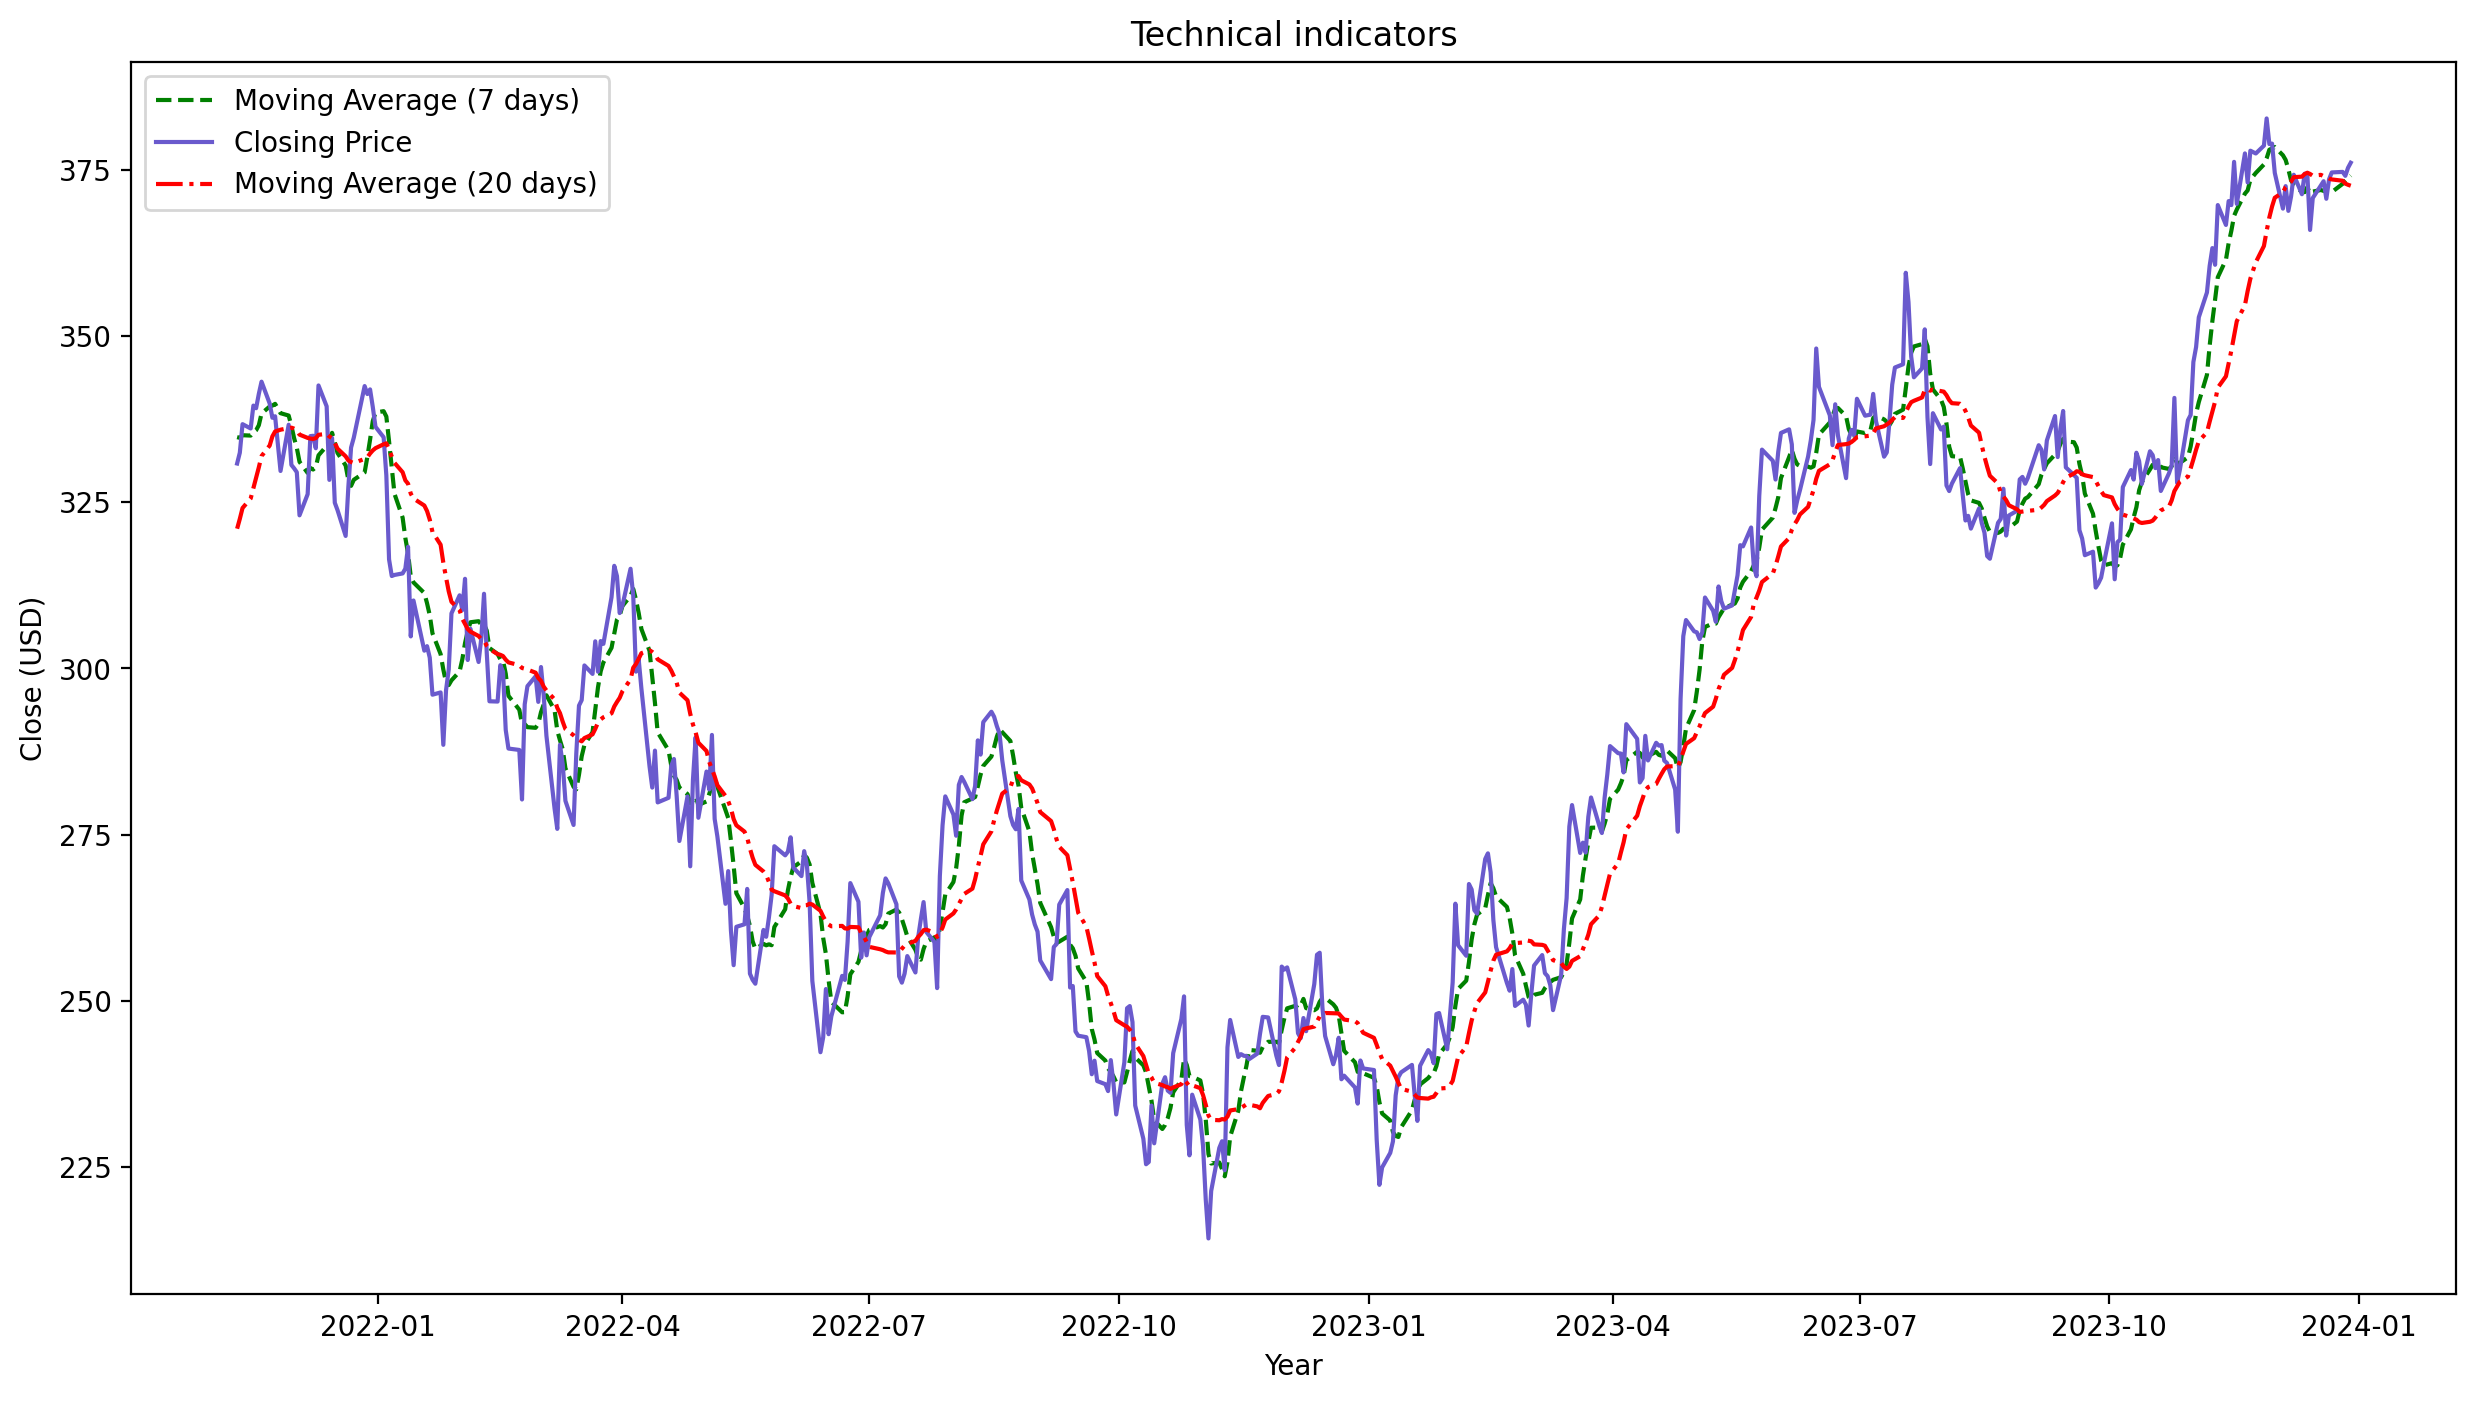

In [72]:
tech_ind(df_stock.iloc[5500:,:])

In [73]:
# Shift the 'price' column by one day to get the previous day's price
df_stock['price_pred'] = df_stock['Adj Close'].shift(1)

# Compare today's price with the previous day's price
df_stock['movement'] = df_stock.apply(lambda row: 1 if row['Adj Close'] > row['price_pred'] else 0 , axis=1)
# Drop the 'previous_price' column if you don't need it anymore
df_stock.drop(columns=['price_pred'], inplace=True)

# Now your DataFrame will have a new column 'movement' indicating if the price went 'UP' or 'DOWN'
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum,movement
0,2000-01-03,58.68750,59.3125,56.00000,58.28125,36.065578,53228400,56.147321,53.557812,-0.406250,2.986904,59.53162,47.584005,58.281250,4.047973,0
1,2000-01-04,56.78125,58.5625,56.12500,56.31250,34.847271,54119000,56.147321,53.557812,-1.135216,2.986904,59.53162,47.584005,56.804688,4.012999,0
2,2000-01-05,55.56250,58.1875,54.68750,56.90625,35.214695,64059600,56.147321,53.557812,-0.826310,2.986904,59.53162,47.584005,56.875000,4.023676,1
3,2000-01-06,56.09375,56.9375,54.18750,55.00000,34.035061,54976600,56.147321,53.557812,-1.135503,2.986904,59.53162,47.584005,55.609375,3.988984,0
4,2000-01-07,54.31250,56.1250,53.65625,55.71875,34.479839,62013600,56.147321,53.557812,-0.808271,2.986904,59.53162,47.584005,55.682593,4.002206,1


## 9. Merging both news and stock dataset

In [74]:
df_master = pd.merge(left=df_stock,right=df_news,on='Date')

In [75]:
# df_master.to_csv('MASTER_MSFT_FINAL.csv')
df_master = pd.read_csv('MASTER_MSFT_FINAL.csv',index_col=[0])
df_master.set_index('Date',inplace=True)
df_master

,Open,High,Low,Close,Adj Close,Volume,MA7,MA20,MACD,20SD,...,title,web,author,combined_news,Subjectivity,Polarity,compound,neg,pos,neu
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,58.687500,59.312500,56.000000,58.281250,36.065578,53228400,56.147321,53.557812,-0.406250,2.986904,...,"['Dow falters; Nasdaq gains - Jan. 3, 2000 - C...","['https://money.cnn.com', 'https://www.cbsnews...","['CNN', 'CBS News', 'Ars Technica', 'Power Eng...","Dow falters; Nasdaq gains - Jan. 3, 2000 - CNN...",0.550000,0.558333,0.8126,0.051,0.241,0.709
2000-01-04,56.781250,58.562500,56.125000,56.312500,34.847271,54119000,56.147321,53.557812,-1.135216,2.986904,...,"[""Public Transportation Account: Options to Ad...","['https://lao.ca.gov', 'http://news.bbc.co.uk'...","[""Legislative Analyst's Office"", 'CBBC Newsrou...",Public Transportation Account: Options to Addr...,0.066667,0.000000,0.0000,0.000,0.000,1.000
2000-01-05,55.562500,58.187500,54.687500,56.906250,35.214695,64059600,56.147321,53.557812,-0.826310,2.986904,...,"['Buddy, Can You Spare a Turbine? - Power Engi...","['https://www.power-eng.com', 'https://www.cbs...","['Power Engineering®️', 'CBS News', 'CNN', 'Mi...","Buddy, Can You Spare a Turbine? - Power Engine...",0.311111,0.211111,0.6369,0.000,0.088,0.912
2000-01-06,56.093750,56.937500,54.187500,55.000000,34.035061,54976600,56.147321,53.557812,-1.135503,2.986904,...,"['Sony stock soaked - Variety', 'Things Lookin...","['https://variety.com', 'https://www.washingto...","['Variety', 'The Washington Post', 'The Washin...",Sony stock soaked - Variety Things Looking Up ...,0.000000,0.000000,0.0000,0.000,0.000,1.000
2000-01-07,54.312500,56.125000,53.656250,55.718750,34.479839,62013600,56.147321,53.557812,-0.808271,2.986904,...,['BUSINESS | Housing: a bust to come? - CBBC N...,"['http://news.bbc.co.uk', 'https://www.austinc...","['CBBC Newsround', 'Austin Chronicle', 'Austin...",BUSINESS | Housing: a bust to come? - CBBC New...,0.545833,0.404167,-0.3939,0.081,0.092,0.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.888580,17091100,371.615714,373.529001,-2.340289,3.975803,...,['Why Applied Materials (AMAT) Outpaced the St...,"['https://finance.yahoo.com', 'https://www.inv...","['Yahoo Finance', ""Investor's Business Daily"",...",Why Applied Materials (AMAT) Outpaced the Stoc...,0.408355,0.064784,0.9524,0.054,0.086,0.860
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.968445,12673100,372.862858,373.331502,-2.423830,3.804540,...,"['The Black Market - Minnesota Monthly', 'Nasd...","['https://www.minnesotamonthly.com', 'https://...","['Minnesota Monthly', 'MarketWatch', 'Financia...",The Black Market - Minnesota Monthly Nasdaq In...,0.481333,0.103970,0.8832,0.008,0.052,0.940
2023-12-27,373.690002,375.059998,372.809998,374.070007,373.379547,14905400,373.340001,372.900002,-2.307701,3.112525,...,"[""Dow Jones Rises Ahead Of Fed Data; Tesla Sto...","['https://www.investors.com', 'https://www.blo...","[""Investor's Business Daily"", 'Bloomberg', 'Th...",Dow Jones Rises Ahead Of Fed Data; Tesla Stock...,0.434963,0.133400,0.7476,0.044,0.060,0.896


## 10. Trying the Base Model

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Set training and testing date ranges
train_data_start = '2005-01-03'
train_data_end = '2021-12-31'
test_data_start = '2022-01-01'
test_data_end = '2023-12-31'

# Extract training and testing datasets
train = df_master.loc[train_data_start:train_data_end]
test = df_master.loc[test_data_start:test_data_end]

# Prepare sentiment scores for training dataset
X_train = train[['Open', 'High', 'Close', 'Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu', 'MA7', 'MA20', 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]
y_train = train['movement']

# Prepare sentiment scores for testing dataset
X_test = test[['Open', 'High', 'Close', 'Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu', 'MA7', 'MA20', 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]
y_test = test['movement']

# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier
nb_classifier.fit(X_train, y_train)

# Predictions for training and testing datasets
prediction_train = nb_classifier.predict(X_train)
prediction_test = nb_classifier.predict(X_test)

# Calculate accuracy and other metrics for training dataset
accuracy_train = accuracy_score(y_train, prediction_train)
confusion_matrix_train = confusion_matrix(y_train, prediction_train)
classification_report_train = classification_report(y_train, prediction_train)

# Calculate accuracy and other metrics for testing dataset
accuracy_test = accuracy_score(y_test, prediction_test)
confusion_matrix_test = confusion_matrix(y_test, prediction_test)
classification_report_test = classification_report(y_test, prediction_test)

# Print the results
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Confusion Matrix:\n", confusion_matrix_train)
print("Classification Report:\n", classification_report_train)
print("\nTesting Metrics:")
print("Accuracy:", accuracy_test)
print("Confusion Matrix:\n", confusion_matrix_test)
print("Classification Report:\n", classification_report_test)


Training Metrics:
Accuracy: 0.5164758121056322
Confusion Matrix:
 [[1581  493]
 [1576  629]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.76      0.60      2074
           1       0.56      0.29      0.38      2205

    accuracy                           0.52      4279
   macro avg       0.53      0.52      0.49      4279
weighted avg       0.53      0.52      0.49      4279


Testing Metrics:
Accuracy: 0.5069860279441117
Confusion Matrix:
 [[  0 247]
 [  0 254]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.51      1.00      0.67       254

    accuracy                           0.51       501
   macro avg       0.25      0.50      0.34       501
weighted avg       0.26      0.51      0.34       501



In [1]:
## plot Heatmap

## 11. Trying out different Classification Model

In [77]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier()
}

# Set training and testing date ranges
train_data_start = '2005-01-03'
train_data_end = '2020-12-31'
test_data_start = '2021-01-01'
test_data_end = '2023-12-31'

# Extract training and testing datasets
train = df_master.loc[train_data_start:train_data_end]
test = df_master.loc[test_data_start:test_data_end]

# Prepare sentiment scores for training dataset
X_train = train[['Open', 'High', 'Close', 'Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu', 'MA7', 'MA20', 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]
y_train = train['movement']

# Prepare sentiment scores for testing dataset
X_test = test[['Open', 'High', 'Close', 'Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu', 'MA7', 'MA20', 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]
y_test = test['movement']

# Iterate through models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions for training and testing datasets
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    # Calculate accuracy and other metrics for training dataset
    accuracy_train = accuracy_score(y_train, prediction_train)
    confusion_matrix_train = confusion_matrix(y_train, prediction_train)
    classification_report_train = classification_report(y_train, prediction_train)
    
    # Calculate accuracy and other metrics for testing dataset
    accuracy_test = accuracy_score(y_test, prediction_test)
    confusion_matrix_test = confusion_matrix(y_test, prediction_test)
    classification_report_test = classification_report(y_test, prediction_test)
    
    print(f"Model: {name}")
    print("Training Metrics:")
    print("Accuracy:", accuracy_train)
    print("Confusion Matrix:\n", confusion_matrix_train)
    print("Classification Report:\n", classification_report_train)
    print("\nTesting Metrics:")
    print("Accuracy:", accuracy_test)
    print("Confusion Matrix:\n", confusion_matrix_test)
    print("Classification Report:\n", classification_report_test)
    print("------------------------------------------------------")


Model: Logistic Regression
Training Metrics:
Accuracy: 0.8654084926744475
Confusion Matrix:
 [[1679  276]
 [ 266 1806]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1955
           1       0.87      0.87      0.87      2072

    accuracy                           0.87      4027
   macro avg       0.87      0.87      0.87      4027
weighted avg       0.87      0.87      0.87      4027


Testing Metrics:
Accuracy: 0.8764940239043825
Confusion Matrix:
 [[314  52]
 [ 41 346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       366
           1       0.87      0.89      0.88       387

    accuracy                           0.88       753
   macro avg       0.88      0.88      0.88       753
weighted avg       0.88      0.88      0.88       753

------------------------------------------------------
Model: Random Forest
Training Metr

### Logistic regression is giving the best result

## 12. Building the model with Logistic Regression using GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Set training and testing date ranges
train_data_start = '2005-01-03'
train_data_end = '2021-12-31'
test_data_start = '2022-01-01'
test_data_end = '2023-12-31'

# Extract training and testing datasets
train = df_master.loc[train_data_start:train_data_end]

test = df_master.loc[test_data_start:test_data_end]

# Prepare sentiment scores for training dataset
X_train = train[['Open','High','Close','Subjectivity','Polarity','compound', 'neg', 'pos', 'neu', 'MA7', 'MA20', 'MACD',
       '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]

y_train = train['movement']

# Prepare sentiment scores for testing dataset
X_test = test[['Open','High','Close','Subjectivity','Polarity', 'compound', 'neg', 'pos', 'neu', 'MA7', 'MA20', 'MACD',
       '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]
y_test = test['movement']

# Define the parameter grid
param_grid = {
    'C': [100,110,120,130],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term ('l1' for Lasso, 'l2' for Ridge)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions for training and testing datasets using the best model
prediction_train_best = best_model.predict(X_train)
prediction_test_best = best_model.predict(X_test)

# Calculate accuracy and other metrics for training dataset using the best model
accuracy_train_best = accuracy_score(y_train, prediction_train_best)
confusion_matrix_train_best = confusion_matrix(y_train, prediction_train_best)
classification_report_train_best = classification_report(y_train, prediction_train_best)

# Calculate accuracy and other metrics for testing dataset using the best model
accuracy_test_best = accuracy_score(y_test, prediction_test_best)
confusion_matrix_test_best = confusion_matrix(y_test, prediction_test_best)
classification_report_test_best = classification_report(y_test, prediction_test_best)

# Print the results
print("Best Model Training Metrics:")
print("Accuracy:", accuracy_train_best)
print("Confusion Matrix:\n", confusion_matrix_train_best)
print("Classification Report:\n", classification_report_train_best)
print("\nBest Model Testing Metrics:")
print("Accuracy:", accuracy_test_best)
print("Confusion Matrix:\n", confusion_matrix_test_best)
print("Classification Report:\n", classification_report_test_best)


Best Model Training Metrics:
Accuracy: 0.872400093479785
Confusion Matrix:
 [[1846  228]
 [ 318 1887]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2074
           1       0.89      0.86      0.87      2205

    accuracy                           0.87      4279
   macro avg       0.87      0.87      0.87      4279
weighted avg       0.87      0.87      0.87      4279


Best Model Testing Metrics:
Accuracy: 0.8882235528942116
Confusion Matrix:
 [[227  20]
 [ 36 218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       247
           1       0.92      0.86      0.89       254

    accuracy                           0.89       501
   macro avg       0.89      0.89      0.89       501
weighted avg       0.89      0.89      0.89       501



In [79]:
def plot_confusion_matrix(y_true, y_pred, labels=["Decrease", "Increase"], 
                          normalize=False, title=None, cmap=plt.cm.winter):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Show all ticks and label them with the respective list entries
    ax.set(xticks=np.arange(len(labels)),
           yticks=np.arange(len(labels)),
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=16)
    ax.grid(False)
    fig.tight_layout()
    return ax


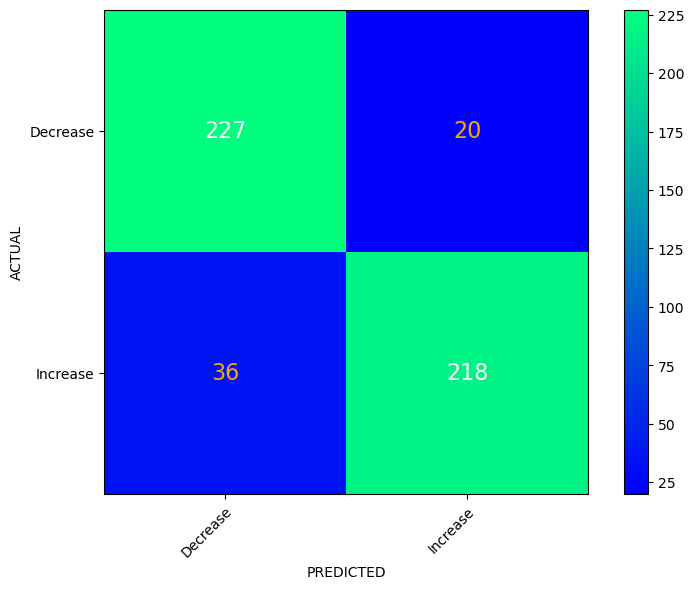

In [80]:
plot_confusion_matrix(y_test, prediction_test_best)
plt.savefig('test_result.png')
plt.show()

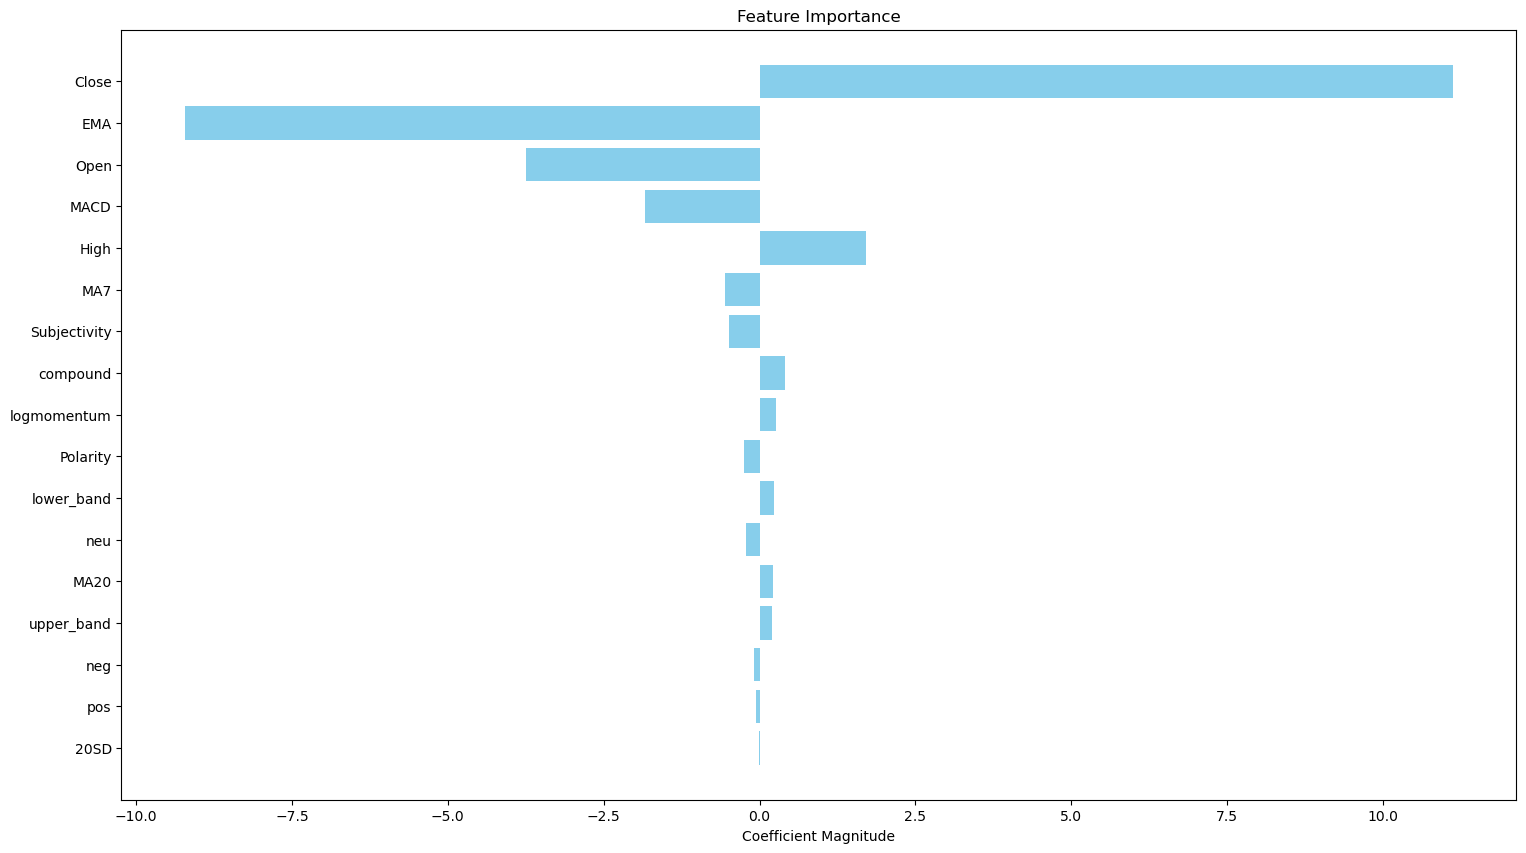

In [83]:
# Get the coefficients of the best model
coefficients = best_model.coef_[0]

# Map coefficients to feature names
feature_names = X_train.columns

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to identify important features
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Plot feature importance
plt.figure(figsize=(18, 10))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display features with highest importance at the top
plt.show()


## Saving the model to Local for further Use

In [82]:
# import joblib

# # # Load the model
# # model = joblib.load('model.joblib')

# # Export the model to a file
# joblib.dump(model, 'best_model_logreg.pkl')